In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import spacy
from ast import literal_eval
import folium
import dataframe_image as dfi


#need to run this line in terminal to install the Spanish lemmatization library - >> python -m spacy download es_core_news_sm

nlp = spacy.load('es_core_news_sm')


df1 = pd.read_csv('Airtables/CBP One 23/Cleaned Privilege Document CBP ONE 2023.csv')

df3 = pd.read_csv('Airtables/T42_Exceptions Post Consortium/CleanedT42File.csv')

df4 = pd.read_csv('Airtables/T42_Screenings/T42 Screenings (Combined) data.csv')

df = pd.concat([df1, df3, df4], axis=0, ignore_index=True)
df

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Explain Crime/Violence,Explain Health Problem,Health Problem
0,2023-01-24 00:00:00.000,Andrea Arias Guillen,Mexico,1994-12-16 00:00:00,Solo el proceso fue lento con la app del CBPone,1.0,Unknown,Unknown,NaN,NaN,NaN
1,2023-01-24 00:00:00.000,Winder Roberto Pernia Jimenez,Colombia,1991-10-15 00:00:00,NaN,4.0,Unknown,Unknown,NaN,NaN,NaN
2,2023-01-24 00:00:00.000,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05 00:00:00,NaN,3.0,Unknown,Unknown,NaN,NaN,NaN
3,2023-01-24 00:00:00.000,Pedro Rios,Mexico,1972-06-11 00:00:00,NaN,1.0,Unknown,Unknown,NaN,NaN,NaN
4,2023-01-24 00:00:00.000,Lesly Martinez,Honduras,1972-04-13 00:00:00,No puede enviar su informacion ha batallado mu...,1.0,Unknown,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3057,06/11/2021,Rosa Maria Sales,Guatemala,8/7/2009,Verified no status in a third country/no US de...,4.0,No,No,NaN,NaN,No
3058,06/11/2021,Liliana Maceda Roque,Mexico,10/12/2001,NaN,2.0,Si,No,Por amenazas tengo mucho miedo q me maten ami ...,NaN,No
3059,06/11/2021,Keylin Minora Zepeda Banegas,Honduras,11/6/1989,NaN,2.0,Si,No,Pues me da miedo salir ala calle me da miedo m...,NaN,No
3060,06/11/2021,Brenda Yamileth Lara barahona,Honduras,16/5/1989,Verified no status in a third country/no US de...,3.0,Si,No,Yo Brenda Yamileth Lara barahona fui secuestra...,Estoy padesiendoede trauma insomnio nervios,Si


In [2]:
df.drop_duplicates(subset=['Name', "Date of Birth"], ignore_index=True, inplace=True)
df

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Explain Crime/Violence,Explain Health Problem,Health Problem
0,2023-01-24 00:00:00.000,Andrea Arias Guillen,Mexico,1994-12-16 00:00:00,Solo el proceso fue lento con la app del CBPone,1.0,Unknown,Unknown,NaN,NaN,NaN
1,2023-01-24 00:00:00.000,Winder Roberto Pernia Jimenez,Colombia,1991-10-15 00:00:00,NaN,4.0,Unknown,Unknown,NaN,NaN,NaN
2,2023-01-24 00:00:00.000,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05 00:00:00,NaN,3.0,Unknown,Unknown,NaN,NaN,NaN
3,2023-01-24 00:00:00.000,Pedro Rios,Mexico,1972-06-11 00:00:00,NaN,1.0,Unknown,Unknown,NaN,NaN,NaN
4,2023-01-24 00:00:00.000,Lesly Martinez,Honduras,1972-04-13 00:00:00,No puede enviar su informacion ha batallado mu...,1.0,Unknown,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3037,06/11/2021,Rosa Maria Sales,Guatemala,8/7/2009,Verified no status in a third country/no US de...,4.0,No,No,NaN,NaN,No
3038,06/11/2021,Liliana Maceda Roque,Mexico,10/12/2001,NaN,2.0,Si,No,Por amenazas tengo mucho miedo q me maten ami ...,NaN,No
3039,06/11/2021,Keylin Minora Zepeda Banegas,Honduras,11/6/1989,NaN,2.0,Si,No,Pues me da miedo salir ala calle me da miedo m...,NaN,No
3040,06/11/2021,Brenda Yamileth Lara barahona,Honduras,16/5/1989,Verified no status in a third country/no US de...,3.0,Si,No,Yo Brenda Yamileth Lara barahona fui secuestra...,Estoy padesiendoede trauma insomnio nervios,Si


In [3]:
df['Name'].value_counts()

Name
Orlin Adolfo Bonilla               2
Julissa Cruz Ramirez               2
Abner Isaac Cruz                   2
Rixy Merari Motiño Chicas          2
Nolvia Jamileth Perez Perez        2
                                  ..
Arlett Ricardo Cardeso             1
Norma Nazareth Cadenas             1
Jose Miguel Izquierdo Rodriguez    1
Daxiber Carolina Lopez Azocar      1
Julio Cesar Betancourt Gonzalez    1
Name: count, Length: 3035, dtype: int64

In [4]:
print(df['Total Family Members'].value_counts())

more_than_1 = df[df['Total Family Members'] != 1]['Total Family Members'].count()
total= df['Total Family Members'].count()
print(more_than_1)
print(total)
print(f"{more_than_1/total} of parties that are not singles" )

Total Family Members
1.0     765
2.0     758
3.0     602
4.0     421
5.0     227
6.0     125
7.0      64
8.0      24
10.0     18
9.0      16
11.0      8
13.0      5
0.0       4
12.0      3
15.0      1
Name: count, dtype: int64
2276
3041
0.7484380138112463 of parties that are not singles


In [5]:
df['Total Family Members'] = df['Total Family Members'].fillna(1)
df['Total Family Members'] = df['Total Family Members'].replace(0,1)

In [6]:
nan_count = df['Total Family Members'].isna().sum()
print(nan_count)

0


In [7]:
print(f"Total Number of people in every party: \033[1m{int(df['Total Family Members'].sum())}\033[0m")
print(f"Average Party Size: \033[1m{df['Total Family Members'].mean()}\033[0m")
#prior to turning every row that didnt have the total family members into a 

Total Number of people in every party: 8829
Average Party Size: 2.9023668639053253


In [8]:
df['LGBTQ+'] = df['LGBTQ+'].replace(False, "No")
df['LGBTQ+'] = df['LGBTQ+'].replace(True, "Si")
df['LGBTQ+'] = df['LGBTQ+'].replace("Prefiero no decir", "Unknown")
df['LGBTQ+'] = df['LGBTQ+'].replace( "Mi niño es ciudadano estadounidense nacio el 14 de abril de 2017 en el hospital Mission  en Alton texas.","Unknown")


df['LGBTQ+'].value_counts()


LGBTQ+
No         1675
Unknown    1152
Si          210
Name: count, dtype: int64

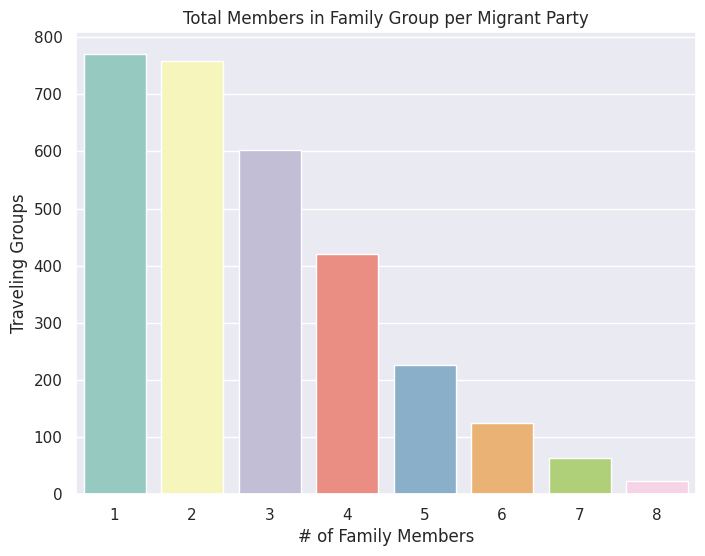

In [9]:
# Create a count plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df['Total Family Members'] = df['Total Family Members'].astype(int)
sns.countplot(x='Total Family Members', data=df, palette="Set3", hue="Total Family Members", legend=False, order=sorted(df['Total Family Members'].unique())[:-6])

# Customize the plot (optional)
plt.title('Total Members in Family Group per Migrant Party')
plt.xlabel('# of Family Members')
plt.ylabel('Traveling Groups')
plt.savefig('Total Members in Family Group per Migrant Party.png', bbox_inches='tight')
# Show the plot
plt.show()


Country of Origin
Venezuela               735
Haiti                   528
Mexico                  527
Honduras                507
Guatemala               275
El Salvador             115
Colombia                 61
Cuba                     44
Other                    42
Ecuador                  40
Nicaragua                16
Republica Dominicana      1
Djibouti                  1
Russia                    1
Peru                      1
Cameroon                  1
Name: count, dtype: int64


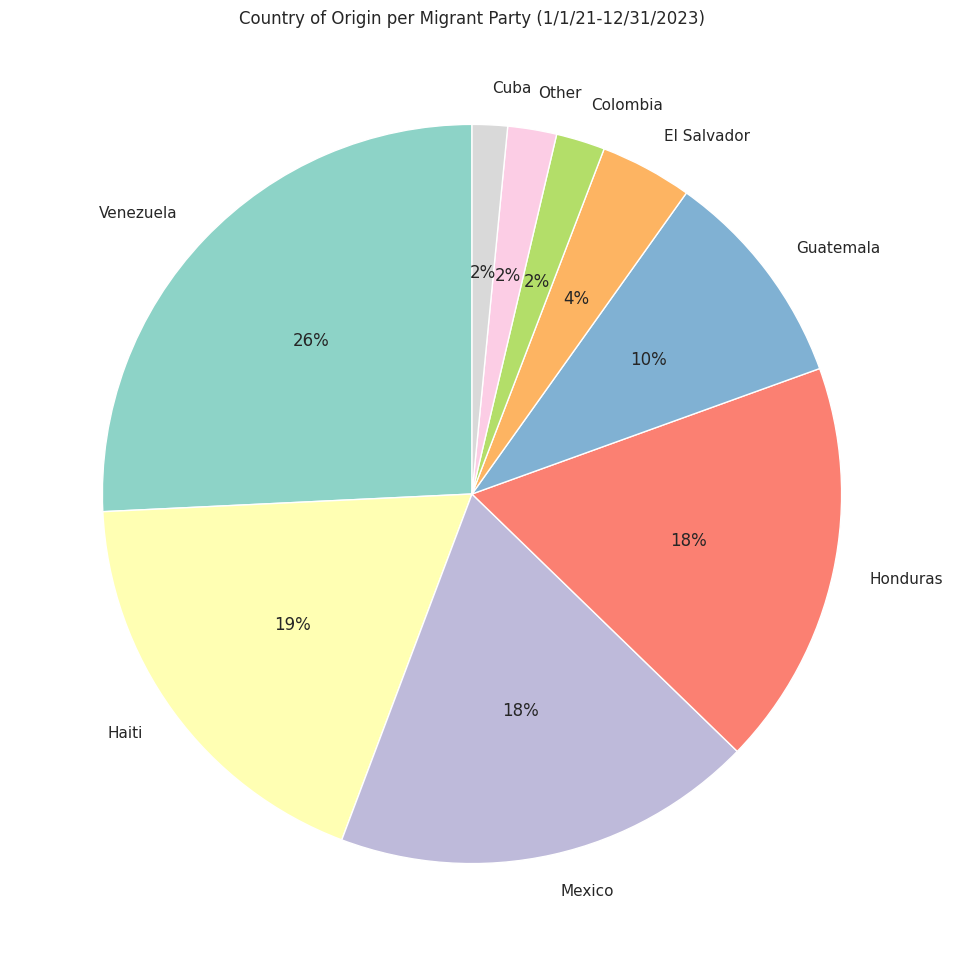

In [10]:
country_mapping = {
    'México': 'Mexico',
    'Venezula': 'Venezuela',
    'Nicaragua': 'Nicaragua',
    'venezuela' : 'Venezuela',
    'Otro': 'Other',
    "mexico": "Mexico",
    "Mujer" : "Other",
    "Hombre" : "Other"
}



df["Country of Origin"] = df["Country of Origin"].replace(country_mapping).str.strip()

category_counts = df['Country of Origin'].value_counts()
print(category_counts)

lowest_categories = category_counts.nsmallest(7).index.tolist()

# Combine them into "Other"
category_counts['Other'] = category_counts[lowest_categories].sum()
category_counts = category_counts.drop(lowest_categories)
category_counts = category_counts.sort_values(ascending=False)


# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.Set3.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Country of Origin per Migrant Party (1/1/21-12/31/2023)')
plt.savefig("Country of Origin per Migrant Party.png")

# Show the plot
plt.show()


In [11]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

value_counts = df['Country of Origin'].value_counts()

value_counts_df = pd.DataFrame(value_counts).reset_index()

# Rename columns
value_counts_df.columns = ['Country', 'Count']

central_america_coords = [14.69, -90.53]

# Create a map centered around Central America
m = folium.Map(location=central_america_coords, zoom_start=4)

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Immigration Country',
    data=value_counts_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    nan_fill_color='white',
    legend_name="Person per Country",

).add_to(m)

m


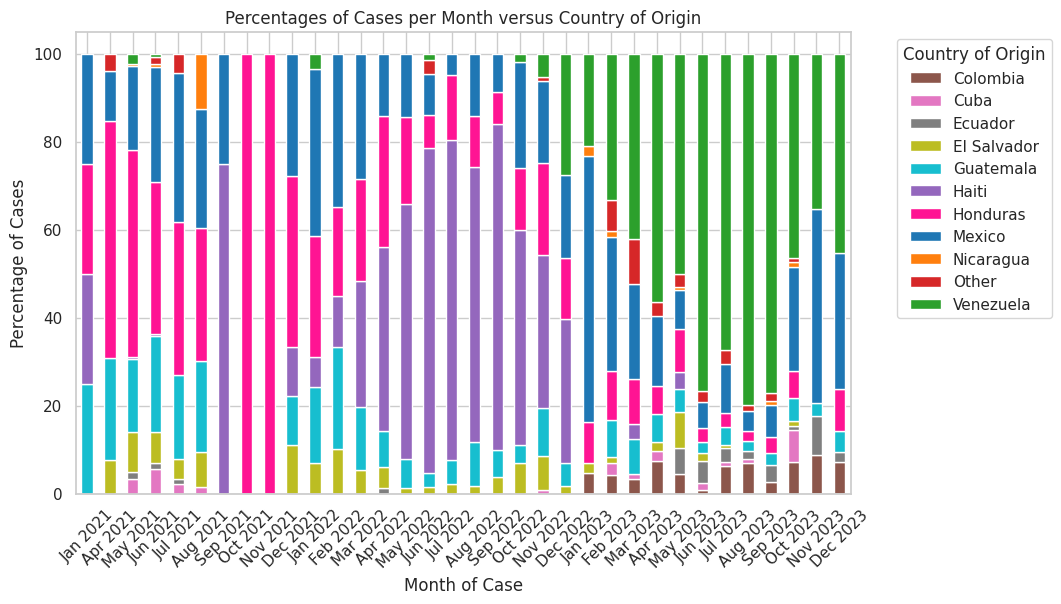

In [12]:
import calendar
import matplotlib as mpl
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
def replace_dates_before(date):
    start_date = datetime.strptime("2021-1-01", '%Y-%m-%d')
    if date < start_date:
        return start_date
    else:
        return date


df['Date'] = df['Date'].apply(replace_dates_before)
# Step 3: Extract month from 'Date of Appt' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

value_counts = df['Country of Origin'].value_counts()

# Get values occurring less than 5 times
values_to_replace = value_counts[value_counts < 5].index.tolist()

# Replace values with 'Other'
df['Country of Origin'] = df['Country of Origin'].replace(values_to_replace, 'Other')


# Step 4: Group data by month and country of origin
grouped = df.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
'''
repeated_data = np.repeat(df.values, df['Total Family Members'], axis=0)

# Create a new DataFrame with the repeated rows
df_repeated = pd.DataFrame(repeated_data, columns=df.columns)

new_grouped = df_repeated.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
dfi.export(new_grouped,"Country of Origin Per Year.png")
'''
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


'''cmap = plt.cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=len(percentages) - 1)
colors = [cmap(norm(i)) for i in range(len(percentages))]
'''

# Step 6: Plot the bar graph
#ax = percentages.plot(kind='bar', stacked=True,figsize=(16, 12), color=['#6495ED', '#3CB371','#FF6347', '#9370DB', '#FA8072', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9467bd', '#ff1493', '#1f77b4', '#ff7f0e', '#d62728','#2ca02c'])
#ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#03A9F4', '#F44336', '#FFEB3B', '#795548'])
#ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#7CB342', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#FFD700', '#F44336', '#FFEB3B', '#8D6E63'])

plt.xlabel('Month of Case')
plt.ylabel('Percentage of Cases')
plt.title('Percentages of Cases per Month versus Country of Origin')
plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.savefig("Cases per Month.png", bbox_inches='tight')
plt.show()


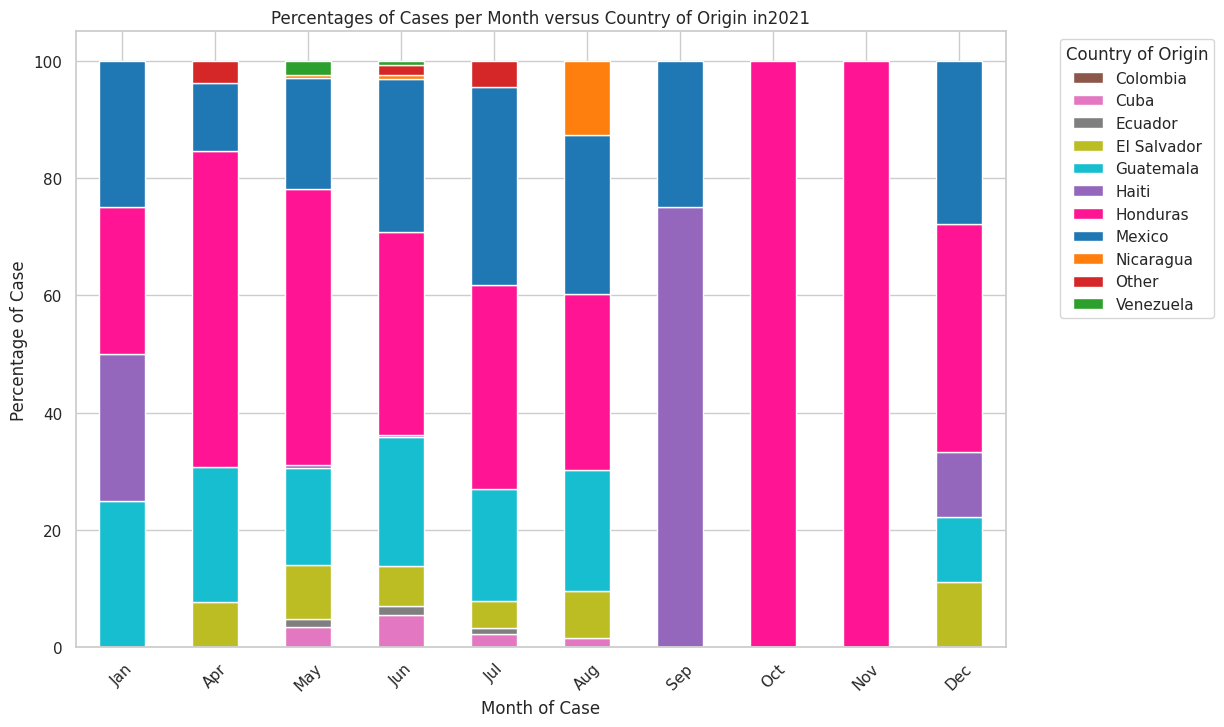

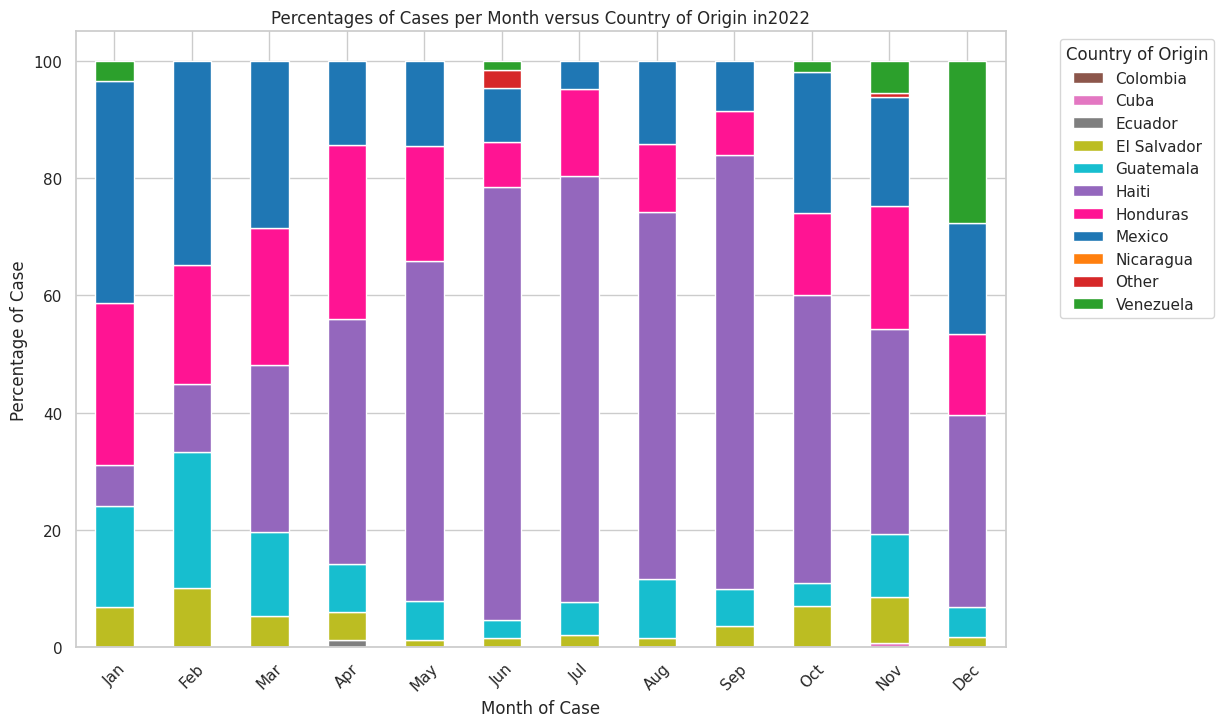

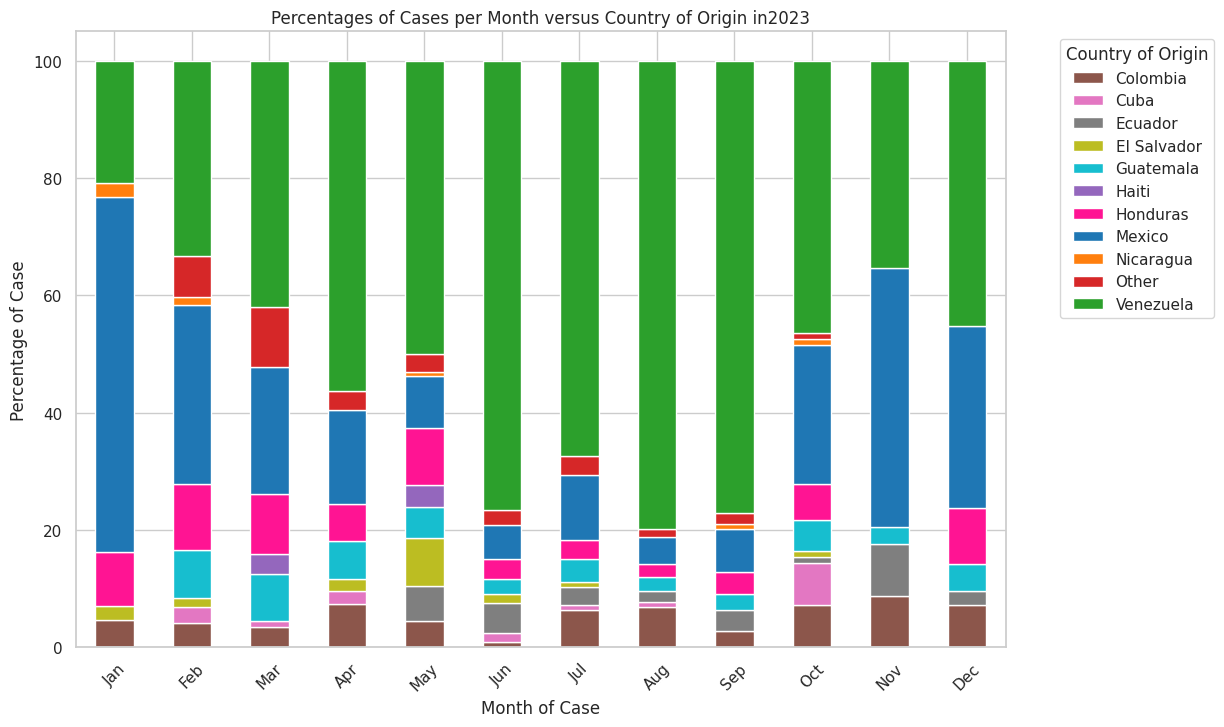

In [13]:
grouped_by_year = percentages.groupby(level=0)

# Initialize a list to hold the individual percentages by year
individual_percentages_by_year = []

# Calculate percentages within each year
for year, group in grouped_by_year:
    total_counts_by_year = group.sum(axis=1)
    individual_percentages_by_year.append(group.div(total_counts_by_year, axis=0) * 100)
for percentages_by_year in individual_percentages_by_year:
    #print((individual_percentages_by_year[0]))
    ax = percentages_by_year.plot(kind='bar', stacked=True, figsize=(12, 8 ), color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9467bd', '#ff1493', '#1f77b4', '#ff7f0e', '#d62728','#2ca02c'])
    #ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#03A9F4', '#F44336', '#FFEB3B', '#795548'])
    #ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#7CB342', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#FFD700', '#F44336', '#FFEB3B', '#8D6E63'])
    plt.xlabel('Month of Case')
    plt.ylabel('Percentage of Case')
    plt.title(f'Percentages of Cases per Month versus Country of Origin in{int(percentages_by_year.index[0][0])}')
    plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(len(percentages_by_year)), [f"{calendar.month_abbr[int(month)]}" for year, month in percentages_by_year.index], rotation=45)
    #plt.tight_layout()
    plt.savefig(f"Call Log by Month in {int(percentages_by_year.index[0][0])}.png", bbox_inches='tight')
    plt.show()




1743
Country of Origin
Colombia         3
Cuba            27
Ecuador         11
El Salvador     97
Guatemala      227
Haiti          520
Honduras       441
Mexico         348
Nicaragua       11
Other           15
Venezuela       43
dtype: int64
Country of Origin
Colombia        3
Cuba            1
Ecuador         2
El Salvador    13
Guatemala      24
Haiti          25
Honduras       32
Mexico         55
Nicaragua       0
Other           3
Venezuela      15
Name: LGBTQ+, dtype: int64


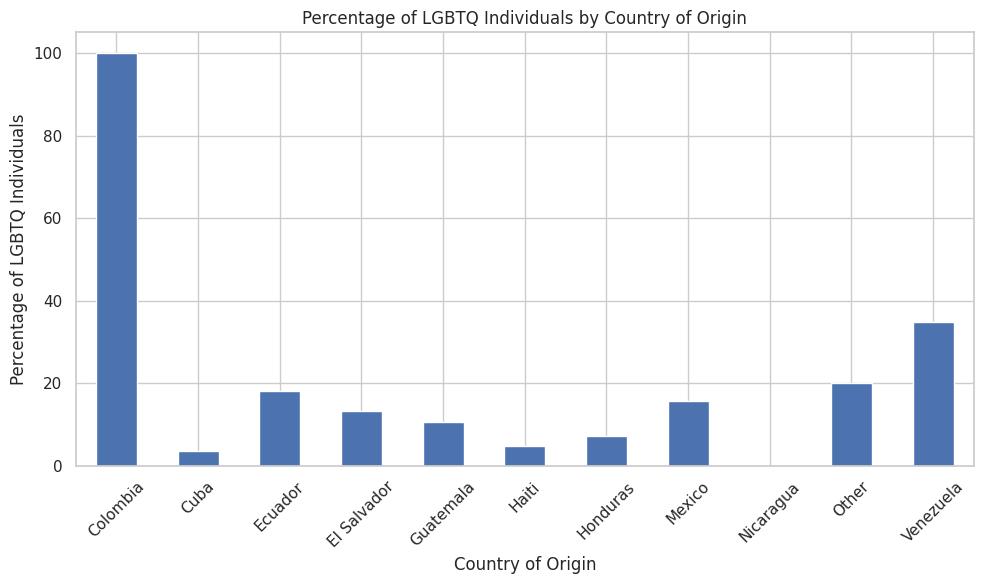

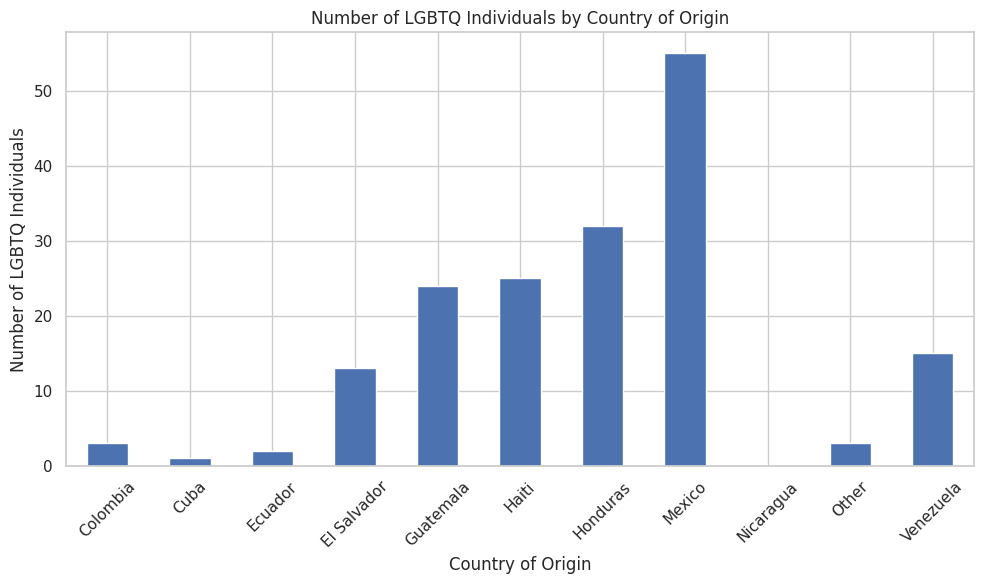

In [14]:
###LGBTQ by Country Graph###
unknowns_removed = df[df["LGBTQ+"] != "Unknown"]
grouped = unknowns_removed.groupby('Country of Origin')

# Step 2: Calculate the total number of individuals from each country
total_individuals = grouped.size()
print(total_individuals.sum())

# Step 3: Calculate the total number of LGBTQ individuals from each country 
lgbtq_individuals = grouped['LGBTQ+'].apply(lambda x: (x == 'Si').sum())
#lgbtq_individuals = grouped['¿Se identifica como miembro de la comunidad LGBTQ+?'].sum()
print(total_individuals)
print(lgbtq_individuals)

# Step 4: Calculate the percentage of LGBTQ individuals for each country
percentages = (lgbtq_individuals / total_individuals) * 100

# Step 5: Plot the percentages on a bar graph
plt.figure(figsize=(10, 6))  # Set the size of the plot
percentages.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Percentage of LGBTQ Individuals')
plt.title('Percentage of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Set the size of the plot
lgbtq_individuals.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of LGBTQ Individuals')
plt.title('Number of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


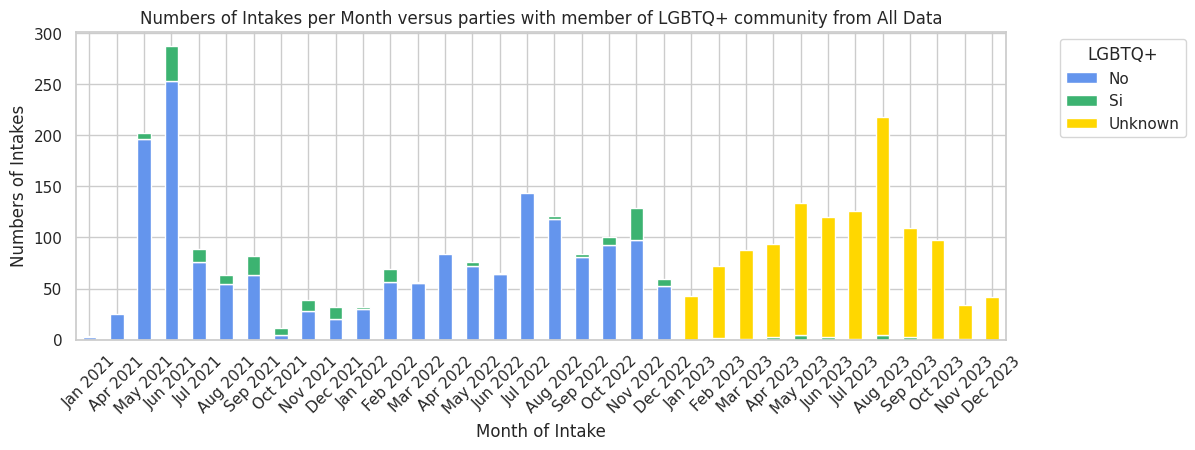

In [15]:
grouped = df.groupby(['Year', 'Month', 'LGBTQ+']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped #grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 6: Plot the bar graph
ax = percentages.plot(kind='bar', stacked=True,figsize=(12, 4), color=['#6495ED', '#3CB371', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
plt.xlabel('Month of Intake')
plt.ylabel('Numbers of Intakes')
plt.title('Numbers of Intakes per Month versus parties with member of LGBTQ+ community from All Data')
plt.legend(title='LGBTQ+', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.show()


In [16]:
replace_violence = {"Si / Yes" : True,
                    "No / No" : False,
                    "Si" : True,
                    "No" : False,
                    "Unknown" : None,
                    "No lo sé / I don't know" : None}
df["Victim of Crime/Violence"] = df["Victim of Crime/Violence"].replace(replace_violence)
df["LGBTQ+"] = df["LGBTQ+"].replace({"Unknown" : None, "No" : False, "Si" : True}) 
grouped = df.groupby([ 'LGBTQ+','Victim of Crime/Violence' ]).size().unstack(fill_value=0)
grouped



Victim of Crime/Violence,False,True
LGBTQ+,,
False,767,908
True,67,134


In [17]:
print(grouped[True][True])
print(grouped[True][False])
print(grouped[False][True])
print(grouped[False][False])

134
908
67
767


In [18]:
percentage_of_LGBTQ_suffer_violence = grouped[True][True]/(grouped[False][True] + grouped[True][True])

percentage_of_non_LGBTQ_suffer_violence = grouped[True][False]/(grouped[True][False] + grouped[False][False])

print(f"percentage of violence by non-LGBTQ+ parties - {percentage_of_non_LGBTQ_suffer_violence:.2%}\npercentage of violence by LGBTQ+ parties - {percentage_of_LGBTQ_suffer_violence:.2%}")


percentage of violence by non-LGBTQ+ parties - 54.21%
percentage of violence by LGBTQ+ parties - 66.67%


In [19]:
percentage_of_total_that_suffer_violence = df["Victim of Crime/Violence"].sum()/df["Victim of Crime/Violence"].count()
print(f"percentage of violence by all parties - {percentage_of_total_that_suffer_violence:.2%}")

percentage of violence by all parties - 62.03%


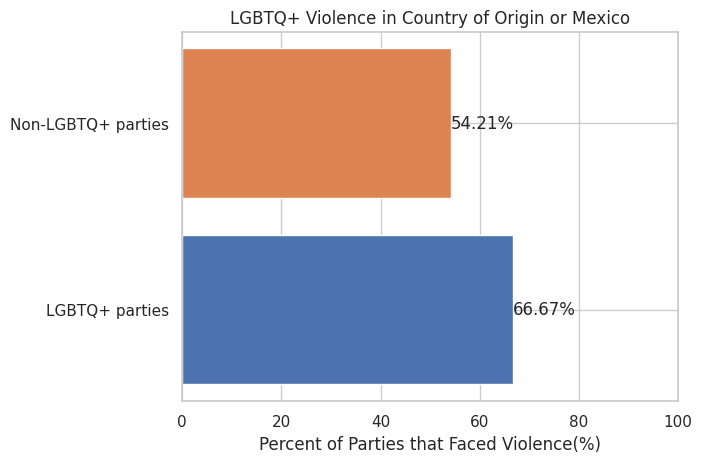

In [20]:
plt.barh("LGBTQ+ parties", percentage_of_LGBTQ_suffer_violence*100)
plt.text(percentage_of_LGBTQ_suffer_violence*100, "LGBTQ+ parties", f"{percentage_of_LGBTQ_suffer_violence:.2%}", va='center', ha='left')

plt.barh("Non-LGBTQ+ parties", percentage_of_non_LGBTQ_suffer_violence*100)
plt.text(percentage_of_non_LGBTQ_suffer_violence*100, "Non-LGBTQ+ parties", f"{percentage_of_non_LGBTQ_suffer_violence:.2%}", va='center', ha='left')


# Adding labels and title
plt.xlabel('Percent of Parties that Faced Violence(%)')
plt.title('LGBTQ+ Violence in Country of Origin or Mexico')

plt.xlim(0,  100)  # Adjust multiplier as needed to provide sufficient space

plt.savefig('LGBTQ+ Violence Faced in Mexico.png', bbox_inches='tight')


# Show plot
plt.show()


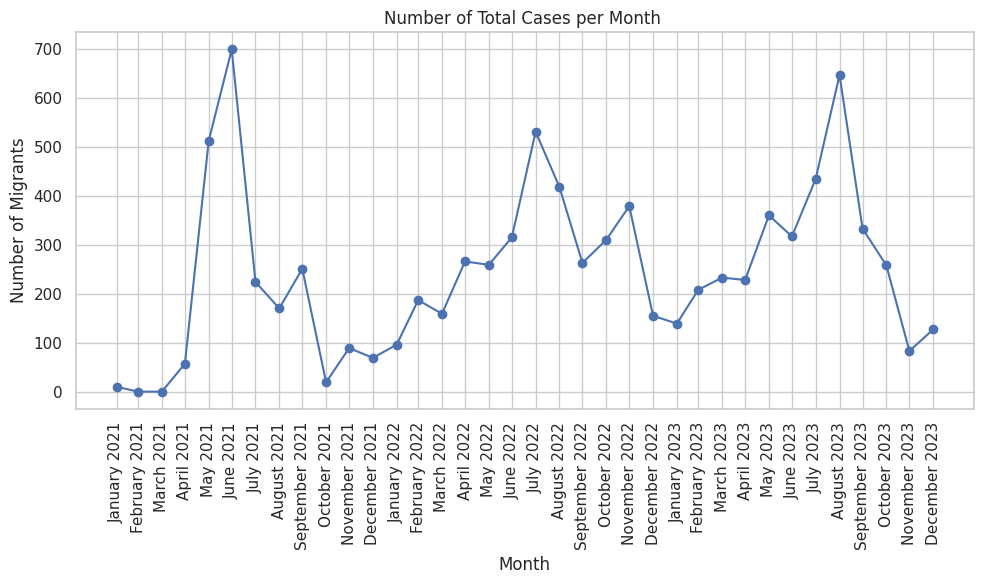

In [21]:
#monthly_counts = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
import numpy as np

# Repeat each row based on the 'value' column
repeated_data = np.repeat(df.values, df['Total Family Members'], axis=0)

# Create a new DataFrame with the repeated rows
df_repeated = pd.DataFrame(repeated_data, columns=df.columns)

# Resetting index to avoid duplicate index values
df_repeated.reset_index(drop=True, inplace=True)


monthly_counts = df_repeated.groupby(pd.Grouper(key='Date', freq='M')).size()

#monthly_counts = (df['Total Family Members'] * df.groupby(pd.Grouper(key='Date', freq='M')).size()).astype(int)
#monthly_counts = monthly_counts.loc[monthly_counts.index.repeat(monthly_counts['Total Family Members'])]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Number of Total Cases per Month ')
plt.xlabel('Month')
plt.ylabel('Number of Migrants')
plt.xticks(monthly_counts.index, monthly_counts.index.strftime('%B %Y'), rotation=90)
plt.savefig('Total Migrants.png', bbox_inches='tight')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
monthly_counts.mean()

244.61111111111111

In [23]:
monthly_counts.max()

699

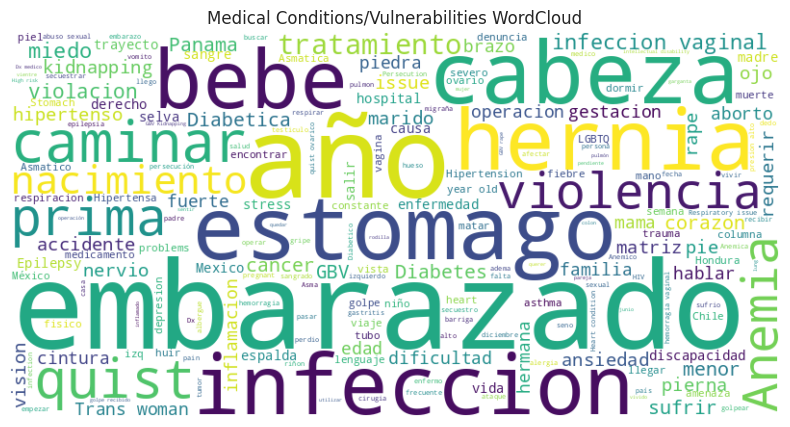

In [24]:
import requests
url = 'https://raw.github.com/stopwords-iso/stopwords-es/master/stopwords-es.txt'
req = requests.get(url)
spanish_stopwords = set(STOPWORDS)
spanish_stopwords.update(req.content.decode("utf-8").split("\n"))
spanish_stopwords.update(["mes", "esposo", "primo","ciudad","calle","hijo","hija", "esposa", "wife", "daughter","son","problema", "problem", "dolor", "padecer", "hermano"])


df_text = df.dropna(subset=['Explain Health Problem'])
text_data = ' '.join(df_text['Explain Health Problem'].astype(str))
tokens = word_tokenize(text_data)

# Lemmatize using spaCy on the original tokens
nlp = spacy.load('es_core_news_sm')
lemmatized_text = ' '.join([token.lemma_ for token in nlp(' '.join(tokens))])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=spanish_stopwords, background_color='white').generate(lemmatized_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Medical Conditions/Vulnerabilities WordCloud")
plt.show()

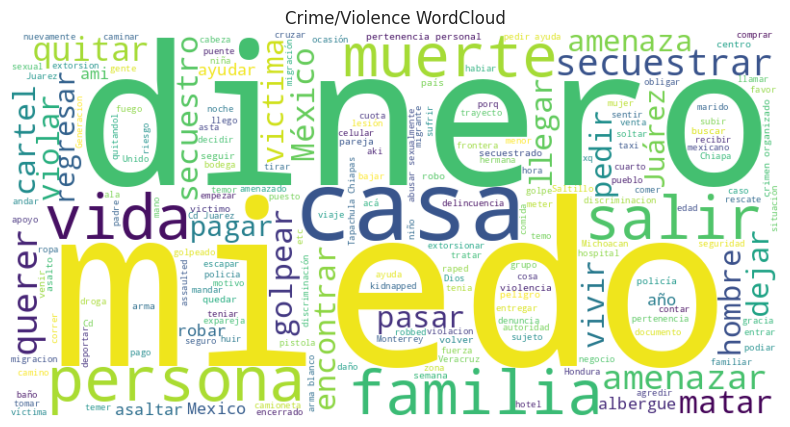

In [25]:
df_text = df.dropna(subset=['Explain Crime/Violence'])
text_data = ' '.join(df_text['Explain Crime/Violence'].astype(str))
tokens = word_tokenize(text_data)

# Lemmatize using spaCy on the original tokens
lemmatized_text = ' '.join([token.lemma_ for token in nlp(' '.join(tokens))])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=spanish_stopwords, background_color='white').generate(lemmatized_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Crime/Violence WordCloud")
plt.show()

In [26]:
#df['Age'] = pd.to_datetime(df['Date'], infer_datetime_format=True, format='mixed') - pd.to_datetime(df['Date of Birth'], infer_datetime_format=True, format='mixed')
def remove_bad_dates(date):
    if type(date) is type(datetime):
        if int(date.year) < 1940:
            return None
        else:
            return date
    else:
        return date
def find_age(age_in_days):
    return age_in_days.days//365.25
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce', format='mixed')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='mixed')
df['Date of Birth'] = df['Date of Birth'].apply(remove_bad_dates)
df['Date'] = df['Date'].apply(remove_bad_dates)
df['Age'] = (df['Date'] - df['Date of Birth'])
df['Age'] = df['Age'].apply(find_age)
df['Age']

0       28.0
1       31.0
2       56.0
3       50.0
4       50.0
        ... 
3037    11.0
3038    19.0
3039    31.0
3040    32.0
3041    38.0
Name: Age, Length: 3042, dtype: float64

In [27]:
df['Age'].median()

31.0

In [28]:
df['Age'].mean()

31.641151685393258

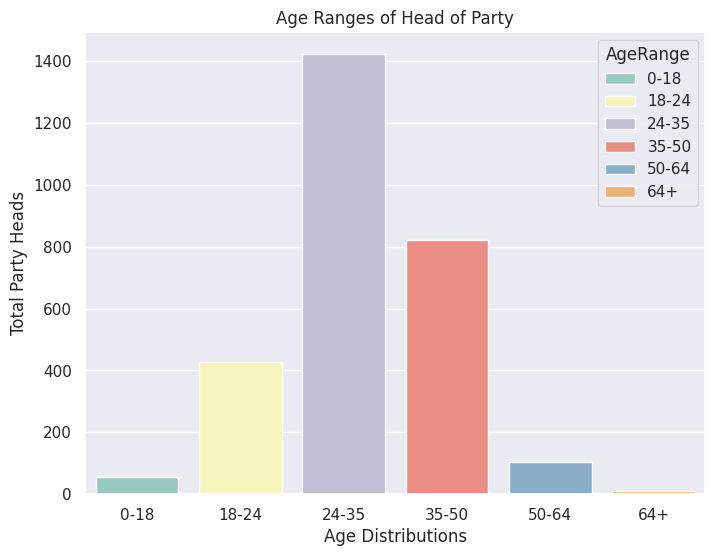

In [29]:
bins = [0, 18, 24, 35, 50, 64 , float('inf')]
labels = ['0-18', '18-24', '24-35', '35-50', '50-64','64+']

# Use pd.cut() to create a new column 'AgeRange' with age ranges
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of each age range
age_range_counts = df['AgeRange'].value_counts()

# Print the resulting DataFrame
# Create a count plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

new_df = df[~df.index.duplicated()] #this works, i dont know why...

sns.countplot(x='AgeRange', data=new_df, palette="Set3", hue="AgeRange")

# Customize the plot (optional)
plt.title('Age Ranges of Head of Party')
plt.xlabel('Age Distributions')
plt.ylabel("Total Party Heads")
plt.savefig("Age Ranges of Head of Party.png")
# Show the plot
plt.show()


In [30]:
age_range_counts

AgeRange
24-35    1422
35-50     821
18-24     427
50-64     105
0-18       55
64+        12
Name: count, dtype: int64

In [31]:
def find_gbv(row):
    word_list = ["viola", "rape", "abuso", "sexual","gbv"]
    explanations = (row["Notes"] + row['Explain Crime/Violence']).lower()
    for word in word_list:
                if word in explanations:
                    return True
    return False

df['Notes'] = df['Notes'].fillna("")
df['Explain Crime/Violence'] = df['Explain Crime/Violence'].fillna("")
df['GBV'] = df.apply(find_gbv, axis=1)


df['GBV'].value_counts()

GBV
False    2815
True      227
Name: count, dtype: int64

In [32]:
random_rows = df[df['GBV'] == True].sample(8)

# Print the random rows
print(str(random_rows['Explain Crime/Violence']))


2320    Su esposa fue violada el pasado lunes por la n...
1304                                                     
229                                                      
1257    Ha sido victima de asalto en las calle, quitan...
2392    Xq era perseguida x maras y pandillas  q trata...
1243    Hace 2 semanas fue agredido y violentado sexua...
2179    Su esposa sufrio de abuso sexual en las calles...
2795    Estoy en peligro x descriminacion x pertenecer...
Name: Explain Crime/Violence, dtype: object


In [33]:
percentages = df['GBV'].value_counts(normalize=True) * 100
percentages

GBV
False    92.537804
True      7.462196
Name: proportion, dtype: float64

In [34]:
df.iloc[2323]['Explain Crime/Violence']

'En Tapachula, Chiapas fueron victimas de asalto dentro de la casa que rentaban, les quitaron todo: dinero, ropa, etc.'